가설 : KBO에서 오랫동안 활약한 투수가 좋은 투수라 생각하고, 2019년 신규 외국인 투수중 이와 비슷한 유형의 투수를 스카웃하면 팀 성적에 도움이 될 것이다.

1. 2011~2018 외국인 투수의 지표분석

In [ ]:
import pandas as pd
#2011~2018 KBO에서 활약한 외국인 선수 정규시즌 성적
ob_k = pd.read_csv('kbo_yearly_foreigners_2011_2018.csv')
#2011~2018 KBO에서 활약한 외국인 선수 입성 전, MLB 정규시즌 성적
ob_s = pd.read_csv('baseball_savant_foreigners_2011_2018.csv')
#2011~2018 KBO에서 활약한 외국인 선수 입성 전, MLB 스탯캐스트 데이터
ob_m = pd.read_csv('fangraphs_foreigners_2011_2018.csv')
#2019 신규 외국인 투수들의 MLB 정규시즌 성적
nb_s = pd.read_csv('baseball_savant_foreigners_2019.csv')
#2019 신규 외국인 투수들의 MLB 스탯캐스트 데이터
nb_m = pd.read_csv('fangraphs_foreigners_2019.csv')

In [ ]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
#투수별 KBO에서 활약한 총연수를 구하기 위한 작업

# 투수별 활약한 총연수를 구한다.
A = ob_k.groupby(ob_k.pitcher_name).size()
B = pd.DataFrame({'pitcher_name': A.index, 'years':A.values})
OB = pd.merge(ob_m, B) #기존 MLB 자료에 한국에서 활약한 총연수 지표를 추가한다.

In [ ]:
OB

,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%,years
0,오간도,2011.0,3.51,3.3,693.0,149.0,16.0,43.0,7.0,126.0,1.14,0.265,3.65,0.237,0.364,0.674,0.147,0.090,0.475,1
1,오간도,2013.0,3.11,0.9,428.0,87.0,11.0,41.0,5.0,72.0,1.23,0.254,4.36,0.180,0.407,0.543,0.095,0.081,0.447,1
2,오간도,2010.0,1.30,0.8,171.0,31.0,2.0,16.0,1.0,39.0,1.13,0.257,3.05,0.179,0.438,0.643,0.186,0.109,0.464,1
3,오간도,2012.0,3.27,0.8,263.0,49.0,9.0,17.0,2.0,66.0,1.00,0.237,3.73,0.210,0.375,0.639,0.137,0.132,0.495,1
4,오간도,2014.0,6.84,0.1,122.0,33.0,1.0,15.0,1.0,22.0,1.92,0.386,3.81,0.193,0.349,0.677,0.053,0.095,0.460,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,리즈,2015.0,4.24,-0.2,106.0,26.0,4.0,12.0,3.0,27.0,1.63,0.367,4.98,0.349,0.349,0.690,0.158,0.103,0.461,3
197,레일리,2013.0,5.14,-0.2,61.0,11.0,2.0,8.0,2.0,14.0,1.36,0.257,5.05,0.278,0.472,0.587,0.111,0.089,0.426,4
198,레일리,2012.0,8.14,-0.4,116.0,33.0,7.0,11.0,0.0,16.0,1.81,0.317,6.88,0.230,0.379,0.496,0.088,0.099,0.441,4
199,니퍼트,2010.0,4.29,-0.3,262.0,61.0,7.0,34.0,5.0,47.0,1.68,0.320,5.09,0.267,0.320,0.666,0.099,0.082,0.423,8


2. 2011~2018 활약한 외국인 투수중 오랫동안 활약한 투수의 지표분석

In [ ]:
#PCA 방식으로 지표를 분석한다.

from sklearn.decomposition import PCA
pca = PCA(2) #Project to 2 dimensions
ob_m_pure_index = OB[['ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP', 'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'FB%', 'IFFB%', 'SwStr%', 'Swing%']] #활약한 해와 이름을 제외한 의미있는 지표만을 취한다.
ob_projected = pca.fit_transform(ob_m_pure_index) #PCA 분석 및 프로섹션 수행

In [ ]:
#선수에 대한 그래프 표시 간편화를 위해 선수의 자료 대표값으로 평균을 택함.

OB_mean = OB.groupby('pitcher_name').mean()

In [ ]:
import matplotlib as mpl
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (14, 4)
mpl.rcParams['axes.unicode_minus'] = False

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0, flags=

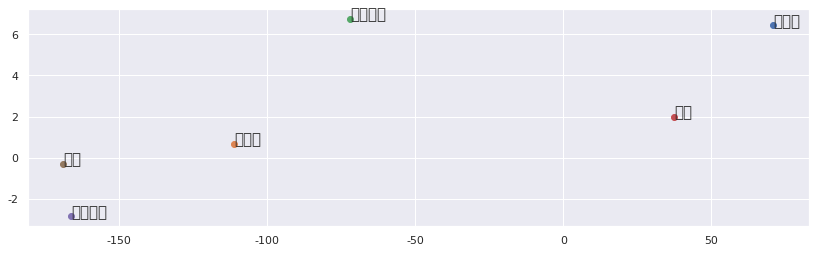

In [ ]:
# 기존 외국인 투수를 PCA 평면에 그린다.
# KBO에서 오랫동안 활약한 투수를 훌륭한 투수로 가정한다.
# 이를 기준으로 신규 투수를 스카우트하고자 한다.
# 여기서는 KBO에서 4년이상 활약한 투수만을 대상으로 한다.

Work_year = 4
OB_mean_pure_index = OB_mean[['ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP', 'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'FB%', 'IFFB%', 'SwStr%', 'Swing%']] #활약한 해와 이름을 제외한 숫자 지표를 얻어온다.
OB_mean_projected = pca.transform(OB_mean_pure_index) #PCA 평면으로 이동

fig, ax = plt.subplots()

for i, txt in enumerate(OB_mean.index):
  if OB_mean.iloc[i]['years'] >= Work_year:
      ax.scatter(OB_mean_projected[i, 0], OB_mean_projected[i, 1])
      ax.annotate(txt, (OB_mean_projected[i,0], OB_mean_projected[i,1]))

3. 2019년 새롭게 들어온 외국인 투수의 지표 분석

In [ ]:
# 신규 선수의 지표를 구한다.
# 여러해 활약한 선수를 고려하여 선수의 평균 지표를ㄹ 선수를 나타내는 대표값으로 한다.

NB = nb_m[['pitcher_name', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP', 'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%', 'Swing%']]
NB_mean = NB.groupby('pitcher_name').mean()
NB_mean['label'] = list(range(1, NB_mean.shape[0] + 1))

In [ ]:
#선수구별을 위해 숫자 라벨을 붙인다.
NB_mean['label'] = list(range(1, NB_mean.shape[0] + 1))
NB_mean

,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%,label
pitcher_name,,,,,,,,,,,,,,,,,,
루친스키,6.832500,-0.025000,61.500000,15.750000,1.250000,5.750000,1.500000,11.000000,1.972500,0.412250,5.267500,0.183750,0.48425,0.501250,0.126500,0.090750,0.449500,1
맥과이어,4.395000,-0.200000,116.500000,24.000000,5.000000,14.000000,3.000000,22.000000,1.280000,0.249500,5.055000,0.188000,0.32450,0.601000,0.086500,0.093000,0.441000,2
버틀러,5.878000,-0.120000,240.800000,64.200000,8.600000,23.400000,2.200000,30.600000,1.678000,0.313600,5.564000,0.224400,0.48680,0.639600,0.086400,0.065600,0.468200,3
서폴드,5.596667,-0.200000,162.333333,40.666667,5.000000,15.666667,3.000000,23.333333,1.720000,0.354667,4.506667,0.248333,0.46300,0.492333,0.068667,0.083333,0.463333,4
알칸타라,7.190000,-0.450000,105.500000,26.500000,7.000000,8.000000,3.500000,13.000000,1.495000,0.265000,7.475000,0.180500,0.44150,0.639000,0.062000,0.071000,0.459000,5
요키시,1.880000,-0.200000,66.000000,18.000000,3.000000,4.000000,0.000000,10.000000,1.530000,0.306000,5.300000,0.235000,0.51000,0.582000,0.077000,0.084000,0.466000,6
윌랜드,7.702500,-0.125000,59.000000,15.250000,2.750000,4.750000,0.250000,9.750000,1.662500,0.325500,5.692500,0.241250,0.41575,0.606250,0.057750,0.075750,0.440750,7
채드벨,7.760000,-0.150000,164.500000,47.500000,6.500000,16.500000,1.500000,32.000000,1.990000,0.431500,4.655000,0.252000,0.44700,0.515500,0.029000,0.101000,0.456500,8
켈리,5.752500,0.050000,99.500000,29.000000,2.500000,6.250000,1.500000,14.000000,1.682500,0.358000,4.362500,0.206000,0.48250,0.619500,0.109500,0.083000,0.476500,9


In [ ]:
NB_pure_index = NB_mean[['ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP', 'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'FB%', 'IFFB%', 'SwStr%', 'Swing%']]

In [ ]:
import matplotlib as mpl
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (14, 4)
mpl.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52828 missing from current font.
  font.set_te

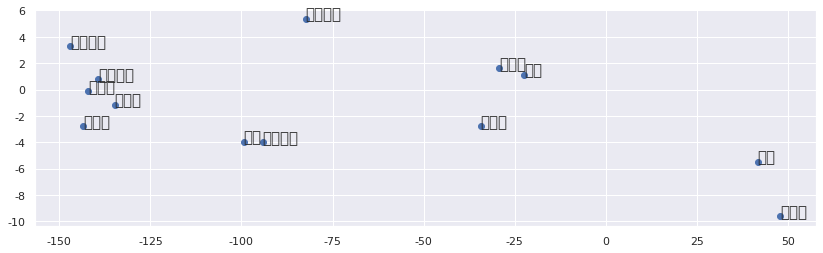

In [ ]:
#신규 외국인 투수의 지표를 PCA 평면에서 그리기
NB_projected = pca.transform(NB_pure_index) #신규 외국인 투수의 PCA에 따른 프로섹션

#그래프 그리기
fig, ax = plt.subplots()
ax.scatter(NB_projected[:, 0], NB_projected[:, 1])

for i, txt in enumerate(NB_mean.index):
  ax.annotate(txt, (NB_projected[i, 0], NB_projected[i, 1]))

4. KBO에서 오랫동안 활약한 외국인 투수의 지표의 성격이 비슷한 투수를 제안

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45768 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text

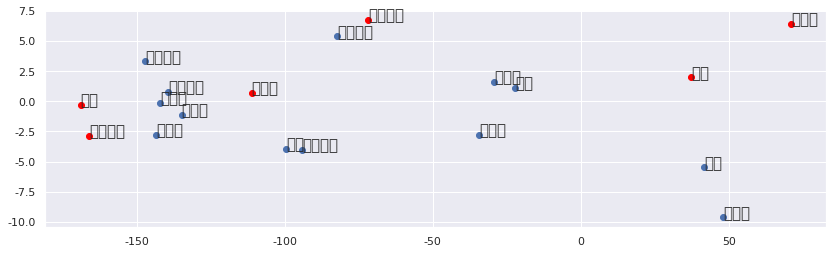

In [ ]:
#KBO 멤버의 MLB 성적과 신규선수의 MLB 성적 동시 표시

Work_year = 4

fig, ax = plt.subplots()

for i, txt in enumerate(OB_mean.index):
  if OB_mean.iloc[i]['years'] >= Work_year:
      txt_ = txt + '(' + str(i) + ')'
      ax.scatter(OB_mean_projected[i, 0], OB_mean_projected[i, 1], color = 'red')
      ax.annotate(txt, (OB_mean_projected[i,0], OB_mean_projected[i,1]))

ax.scatter(NB_projected[:, 0], NB_projected[:, 1])

for i, txt in enumerate(NB_mean.index):
  txt_ = txt + '(' + str(i) + ')'
  ax.annotate(txt, (NB_projected[i, 0], NB_projected[i, 1]))

###그래프 분석

PCA평면에서는 방향과 크기가 비슷한 값이 비슷한 지표를 가진 투수라 볼 수 있다. KBO에서 오랫동안 활약한 들 수 있다.

###스카이팅 제안

###결론

2019년 신규 외국인 투수를 스카우팅 하는 방식을 설명하였다. KBO에서 오랫동안 활약한 투수를 기준으로 이와 비슷한 유형의 투수를 스카우터로서 제안을 하였다. 투수의 지표를 분석하는 방법으로는 PCA방식을 사용하였고 팀에 가장 도움이 될 투수로 제안하였다.